# Introduction to Python 

part 7

## Vpython

# [VPython](http://vpython.org/)
- VPython makes it easy to create navigable 3D displays and animations
  產生3D動畫
- Based on Python


- version 7 support python 3  （version 6 only for python 2）

This package enables one to run VPython in a browser, using the GlowScript VPython API, documented in the Help at http://glowscript.org. 

If the code is in a cell in a Jupyter notebook, the 3D scene appears in the Jupyter notebook. 

If the code is launched outside a notebook (e.g. from the command line), a browser window will open displaying the scene.

VPython makes it unusually easy to create navigable real-time 3D animations. The one-line program "sphere()" produces a 3D sphere with appropriate lighting and with the camera positioned so that the scene fills the view. 

It also activates mouse interactions to zoom and rotate the camera view.

## 安裝
若先安裝了Anaconda後，開啟Anaconda Prompt終端機介面，輸入：

`conda install -c vpython vpython`
 
## 在Jupyter notebook執行
Kernel: 可選用 Python3 或　VPython　

但是重新執行時，要先將Kernel restart

ps:
vpython-jupyter
https://github.com/BruceSherwood/vpython-jupyter

Currently, to re-run a VPython program you need to click the circular arrow icon to "restart the kernel" and then click the red-highlighted button, then click in the first cell, then click the run icon. Alternatively, if you insert "scene = canvas()" at the start of your program, you can rerun the program without restarting the kernel.

## 更新為新版

`conda update -c vpython vpython`

## How GlowScript VPython and VPython 7 differ from Classic VPython 6

- Vectors must be represented as `vector(x,y,z)` or `vec(x,y,z)`, not as (x,y,z).

- The name display has been changed to `canvas` (for technical reasons).

- The name gdisplay has been changed to `graph`.

- curve objects and points objects have a new set of methods.

## A Simple example

draw a box or  a sphere

In [ ]:
# 引入vpython套件
from vpython import *

# 開啟瀏覽器用canvas繪圖
scene = canvas()

# 產生一個3D盒子，位置、大小、顏色都用預設值
box()

## 產生了一個3D的盒子，用滑鼠可拉近與旋轉視線

- 旋轉：
  押著滑鼠右鍵拖拉 或 按住ctrl＋滑鼠左鍵即可

- 拉近：
  按著Alt＋滑鼠左鍵 或 滾動滑鼠滾輪 

- Touch screen: pinch/extend to zoom, swipe or two-finger rotate.

# 編輯器 for VPython
- [IDLE](https://docs.python.org/3/library/idle.html) ， (Python GUI)
- [Visual Studio Code](https://code.visualstudio.com/)， https://code.visualstudio.com/ （錯誤訊息不會顯示）
- [Sublime Text 3](https://www.sublimetext.com/3)， https://www.sublimetext.com/3      (在Linux無法開啟瀏覽器，無法執行，尚待解決)
- [Notepad++](https://notepad-plus-plus.org/zh/)，  https://notepad-plus-plus.org/zh/  (windows only)

# 目前有的教學網站

- http://www.glowscript.org/docs/VPythonDocs/index.html
- http://itrs.tw/wiki/Vpython_tutorial
- 台大石明豐教授 http://vphysics.ntu.edu.tw/
- 南港高中高慧君老師 http://drweb.nksh.tp.edu.tw/student/lessons/F/
- 建國中學曾靖夫老師、賴奕帆老師 http://vphysics.ntu.edu.tw/cktp.php
- 中和高中王一哲老師 https://sites.google.com/view/yizhe/%E8%AA%B2%E7%A8%8B/python%E7%89%A9%E7%90%86%E6%A8%A1%E6%93%AC

# 等速移動的球
- vpython中所有物體的位置表示都用3維位置坐標表示 `pos=vector(x,y,z)`  或 `pos=vec(x,y,z)`

  對於球體pos用來表示球心的位置座標。

![vpython_sphere](.\images\vpython_sphere.png)



- 如何告訴vpython，球在移動：

  由物體運動速度
  $$ v = \frac{\Delta x}{\Delta t}= \lim_{\Delta t \rightarrow 0} \frac{x_f-x_i}{\Delta t} $$

  若數值計算上的時間間隔夠短，則已知速度(未必要是定值)，給定初始位置座標，可推算出下個時間點的位置
  $$  x_f = x_i + v \Delta t $$
  
  將球的每個位置都畫出來，設定執行速率，就可以看到一個移動的球。

In [ ]:
# encoding: utf-8
from vpython import *

'''
設定常數與球的初始狀態
'''
#初速
v = 1.0
#計算經過時間
t = 0.0
#時間間隔
dt = 0.01 
#設定初始位置
x = 0

'''
繪圖、產生物體
'''
scene = canvas()

#產生一個紅色的球，半徑設定為 1
ball = sphere(radius=1.0, color=color.red)


'''
用while，rate讓物理運動
'''
while t < 10.0:  # 執行條件為：經過時間t<10
    
    rate(1/dt)  #每秒執行次數=1/0.01=100次
    
    # 末位置 = 原位置 + 速度 * 時間
    x = x + v * dt 
    
    # 將每次的末位置座標設定為球的球心位置
    ball.pos = vector(x, 0, 0)
    
    t = t + dt

# 3D圖的版面
使用 **canvas** 設定3D的繪圖畫布。
   
`scene = canvas(title='Sphere', width=400, 
                  height=400, center=vector(0,0,0),
                  background=vec(1,1,1)
                  )`

畫面中右方為 +x 軸方向，上方為 +y 軸方向，出螢幕方向為 +z 軸方向，將開啟的動畫視窗命名為 **scene**。

以下是常調整的功能：
   - title: 畫面的標題，顯示於畫面的左上角。
   - width: 畫面寬度（水平方向）。
   - height: 畫面高度（鉛直方向）。
   - x、y: 畫面左上角於瀏覽器視窗中顯示的位置。
   - center: 觀察者所在位置。
   - background: 背景顏色，vector 括號中的數字依序為紅、綠、藍三色  的比例，範圍在 0 ~ 1 之間。也可以使用已經命名的常用顏色。

# 顏色與透明度設定

- Here are some examples of RGB colors, with names you can use in VPython:

vec(1,0,0)= color.red

vec(1,1,0)= color.yellow	

vec(0,0,0)= color.black
   
vec(0,1,0)= color.green	
   
vec(1,0.6,0)= color.orange	

vec(1,1,1)= color.white
    
vec(0,0,1)= color.blue	

vec(0,1,1)= color.cyan	 
    
vec(0.4,0.2,0.6)= color.purple	

vec(1,0,1)= color.magenta	

vector(0.5, 0.5, 0.5) a rather dark gray; or you can say color=color.gray(0.5) to mean (0.5,0.5,0.5)

vector(1,0.7,0.2) a coppery color

- Opacity
You can make most objects be transparent by specifying a value from 0-1 inclusive for the attribute "opacity". 

For example, box(color=color.red, opacity=0.8) is slightly transparent. 

An opacity value of 0 means totally transparent, and 1 means totally opaque.

Currently curve and helix objects do not allow transparency.

## 引入vpython後可直接使用的math function

`abs(x)`

`sqrt(x)`

`sin(x)`

`cos(x)`

`tan(x)`

`asin(x)`    # arc sine

`acos(x)`    # arc cosine

`atan(x)`    # arc tangent

`atan2(y,x)` # angle whose tangent is y/x

`exp(x)`     # e to the x

`log(x)`     # natural log, base e ，log(x)/log(10) gives log base 10

`pow(x,y)`   # x to the power y

`pi`         # 3.14159.... 

`ceil(x)`    # round up to nearest integer

`floor(x)`   # round down to nearest integer

`round(x)`   # round to nearest integer 

`max(x,y,z)` # the largest of x,y,z

`min(x,y,z)` # the smallest of x,y,z

`random()`   # pseudorandom number 0 to 1

`factorial(x)`  # x! = x*(x-1)*(x-2)....(1)

`combin(x,y)`   # x!/(y!*(x-y)!) 

`max(a,b,c,..)` # maximum of these

`min(a,b,c,..)` # minimum of these

There are functions for converting between degrees and radians, where there are 2*pi radians in 360 degrees:

`radians(360)`  # equal to 2*pi

`degrees(2*pi)` # equal to 360

# 用三個移動的球畫出x, y, z三個座標軸

- vpython 的預設座標軸如圖
![vpython_coordinate](.\images\vpython_coordinate.png)

- 畫出軌跡：
  在物體的參數內加入：

  - `make_trail=True` 顯示軌跡

  - `trail_type="points"` 軌跡的型態為點。若不指定，預設為curve

  - `interval=10` 每10個位置畫一個點

  - `retain=50`   只顯示最近的50個點
  
  - `trail_color`  軌跡顏色，預設為物體顏色

In [ ]:
# encoding: utf-8
from vpython import *
#import numpy as np

'''
常數與球的初始狀態
'''
t = 0.0
dt = 0.01


'''
繪圖、產生物體
'''
scene = canvas()

# make_trail=True 表示將球心移動過程畫出來
ballx = sphere(radius=0.1, color=color.red, make_trail=True)
bally = sphere(radius=0.1, color=color.green, make_trail=True)
ballz = sphere(radius=0.1, color=color.blue, make_trail=True)

# ball = sphere(radius=1, color=color.white, make_trail=True)


'''
用while，rate讓物理運動
'''
while t < 10.0:
    rate(200)
    
    ballx.pos = vector(t, 0, 0) #x軸紅色
    bally.pos = vector(0, t, 0) #y軸綠色
    ballz.pos = vector(0, 0, t) #z軸藍色
    
    #ball.pos = vector(np.cos(t**2), np.sin(t), np.sqrt(t))
    
    t = t + dt
    

# 畫2D曲線圖

VPython 本身提供了繪圖套件。

說明文件：http://www.glowscript.org/docs/VPythonDocs/graph.html

- 可繪製曲線圖`gcurve`、散佈圖 `gdots`、長條圖`gvbars` or `ghbars`。

- vpython提供兩種繪圖套件，一種比較快（based on Flot），另一種較慢但提供較豐富的互動介面(based on Plotly)，兩者只在有大量資料時，在繪製速度才有差。

  預設為較快的版本，若要使用另一種，則需在繪圖指令中加上`fast=False`。

- 在曲線圖中使用`markers=True`，會產生數據點。再使用`marker_radius`，可修改點的大小（預設值略大於曲線）；`marker_color`，可修改點的顏色（預設值與曲線同色）

- 曲線名稱可用`label="xxx"`，圖例會出現在右上角。若要取消，則使用`legend=False`。

In [ ]:
from vpython import *

# 畫曲線圖
f1 = gcurve(color=color.cyan, label='Test-Curve')

# 產生數據
for x in arange(0, 8.05, 0.1):
    
    # 畫2D曲線圖，pos=(x軸變數，y軸變數)
    f1.plot(pos=(x,5*cos(2*x)*exp(-0.2*x)))


## 2D繪圖

- 畫出曲線圖後，可再利用給定數據點繪圖（預設顏色為黑色）

  `f1 = gcurve(data=[ [1,2],[5,-2],[8,4] ], color=color.green)`

- 當已經畫了一張圖後，若要在同張圖上面加入新的數據，利用`data=（數據們）`加入（不是用`pos`）

  `f1.plot(data=[100,-30]) # add a single point`

  `f1.plot(data=[[100,-30], [20,50], [0,-10]]) # add a list`

   若只是數值輸入，可以省略`data`這幾個字

## 2D繪圖

- 可以同時畫不同類型的圖在同一張圖上，例如以下的曲線圖跟長條圖：

`
f1 = gcurve(color=color.cyan) 
f2 = gvbars(delta=0.05, color=color.blue)  # 長條圖設定寬度為0.05（預設值為1）
for x in arange(0., 8.05, 0.1): 
    f1.plot(pos=(x,5*cos(2*x)*exp(-0.2*x)))	 # gcurve
    f2.plot(pos=(x,4*cos(0.5*x)*exp(-0.1*x)))    # vbars
`
    
- 若要刪除所有數據圖，並畫上新的數據，則直接下以下指令

`f1.data = [ [10,20], [30,40], [50,60] ]`

## 2D繪圖

- 同時畫出多張圖形：
 
  vpython提供的方式是將畫出的圖先指定名稱，再將要畫的圖畫入指定名稱內，例如：

  `g1 = graph()        # default properties
  gcurve(...)          # will appear in the graph named "g1"
  gdots(graph=g1, ...) # will also appear in "g1"`

  `g2 = graph(width=200,height=100,title='A second graph') # 第二張圖，寬度200，高度100
  gcurve(...)           # will appear in the graph named "g2"
  gdots(graph=g2, ...)  # will also appear in "g2"
  gvbars(graph=g1, ...) # will appear in "g1"`


- You can also obtain the current graph with graph.get_selected(), and you can set the current graph to be the graph named gd by executing gd.select().


- 半對數與對數座標（Log-log and semilog plots）：
  x, y均為正值，畫圖時加上下面指令
  
 `logx=True`  
 
 `logy=True`
 
- 圖的各種設定

`f1 = graph(width=600, height=150, 
      title='<b>Test</b>',
      xtitle='<i>x</i>', ytitle='<i>x</i><sup>2</sup>', 
      foreground=color.black, background=color.white, 
      xmin=-20, xmax=50, ymin=-2e3, ymax=5e3)`
      
  寬600，高150，圖名為Test(粗體)，
  
  x軸名稱為 $x$(italic)，y軸名稱為 $x^2$（若為下標<sub></sub>）。title與軸名稱可用`\n`換行。
  
  x值範圍-20~50，y值範圍$-2\times 10^{-3}$~ $5\times 10^{3}$，
  
  前景黑色（與預設同），背景白色(與預設同)。

# 畫位置-時間關係圖

先設定要畫的圖的參數與型態

`f1 = graph(title='x vs t', xtitle='t', ytitle='x')`

`xt = gcurve(graph=f1, color=color.orange)`

在每次更新位置座標時，將新的座標位置畫出來
`xt.plot(pos=(t, x))`

http://www.glowscript.org/docs/VPythonDocs/graph.html

In [ ]:
# encoding: utf-8
from vpython import *

'''
設定常數與球的初始狀態
'''
#初速
v = 1.0
#計算經過時間
t = 0.0
#時間間隔
dt = 0.01 
#設定初始位置
x = 0

'''
繪圖、產生物體
'''
scene = canvas()

#產生一個紅色的球，半徑設定為 1
ball = sphere(radius=1.0, color=color.red)

'''
畫x-t圖
'''
f1 = graph(x=600, y=0, title='x-t', xtitle='t', ytitle='x', 
            #ymax=1, xmax=2, 
           )
xt = gcurve(graph=f1, color=color.orange)


'''
用while，rate讓物理運動
'''
while t < 10.0:  # 執行條件為：經過時間t<10
    
    rate(1/dt)  #每秒執行次數=1/0.01=100次
    
    # 末位置 = 原位置 + 速度 * 時間
    x = x + v * dt 
    
    # 將每次的末位置座標設定為球的球心位置
    ball.pos = vector(x, 0, 0)
    
    t = t + dt
    # 畫出x-t圖
    xt.plot(pos(t, x))

### 說明：
1. `x = x + v * dt` 將速度乘一小段時間，加上原位置的座標數值，指定為新的位置座標數值也可寫為 `x += v*dt`
   
2. `ball.pos = vector(x, 0, 0)`將新的位置坐標數值放入為物體的位置，就更新了物體的位置。
   上面的敘述也可寫為`ball.pos.x = x`
   將**x**指定為**ball**這個物件的x軸座標位置

3. 如本例，是直接設定一個常數為速度量值，再套入各方向位置的計算來處理。
   另一個方式，是額外指定一個物體相關的參數來設定其速度，例如：

   `ball.v = vector(v,0,0)  #ball 的速度在x軸為x，y軸為0，z軸為0`
   
    若有設定`ball.v=vector(v,0,0)`，則可直接使用`ball.v.x`表示球在x軸上的速度。

# 3D盒子
![vpython_box](.\images\vpython_box.png)

- 指定位置`pos=(x,y,z)`，為此方體的幾何中心

- 指定
  長`length=L`，高`height=H`，寬`width=W`，

  或用 `size=vector(length, height, width)`

In [ ]:
from vpython import *
import numpy as np

#設定位置
x = 1
y = 1
z = 1

L = 3
H = 5
W = 4

box(pos=vec(x,y,z), length=L, height=H,width=W)
#box(pos=vec(x,y,z), size=vector(L,H,W))

# 重要提醒 !!

## VPython doesn’t know any physics !

## You have to tell it what to do.  ---from VPython tutorial document

##  Python本身不懂物理原理！
##  你必須告訴它如何符合物理原理般地運作。

# 自由落體(初速為零)

如何告訴vpython，球在受力的情況下移動呢？

設球體質量為$m$，初位置$x_{i}$，初速$v_{i}$，受到向+x方向的外力$F$作用($F$＝定值)，由牛頓運動定律：
$$
F = m a = m \lim_{\Delta t \rightarrow 0}\frac{\Delta v}{\Delta t} 
$$

$$
a=\frac{F}{m}= \lim_{\Delta t \rightarrow 0}\frac{\Delta v}{\Delta t} =\lim_{\Delta t \rightarrow 0}\frac{v_{f}-{v_{i}}}{\Delta t} 
$$

若數值計算上的時間間隔$\Delta t$夠短，則已知加速度，給定初速，則可算出下個時間點的速度
$$
v_{f}=v_{i}+a \times \Delta t =v_{i}+\frac{F}{m} \times \Delta t 
$$
而下個時間點的位置，則為
$$
x_{f}=x_{i}+v_{f} \times {\Delta t} 
$$

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont

'''
設定常數與球的初始狀態
'''
# 重力加速度
g = cont.g
#球的質量
mass = 1.0
#初始高度量值
y = 10.0
#初始速度量值
v = 0.0


t = 0.0
dt = 0.05


'''
繪圖、產生物體
'''
# 繪出一個寬400像素、高400像素的圖，中心為座標(0,0,0)，背景顏色為白色(1,1,1)
scene = canvas(width=400, height=400, center=vector(0,0,0), background=vec(1,1,1))

# 水平面，用box畫
floor = box(pos=vec(0,0,0), length=50, height=0.05, width=50, color=color.black)

# 畫紅色球，半徑 1
ball = sphere(radius=1.0, color=color.red)


'''
畫x-t、v-t圖
'''
f1 = graph(title='x-t', xtitle='t', ytitle='y')
xt = gcurve(graph=f1, color=color.orange)

f2 = graph(title='v-t', xtitle='t',ytitle='v')
vt = gcurve(graph=f2, color=color.blue)


'''
用while，rate讓物理運動
'''
while t < 100.0:
    rate(500)
    
    # 速度
    v = v + g * dt
    
    # 位置
    y = y - v * dt
    
    # 將算出來的高度位置座標，輸入球的座標位置
    ball.pos = vector(0,y,0)
    
    t = t + dt
    '''
    畫出x-t、v-t圖
    '''
    xt.plot(pos=(t, y))
    vt.plot(pos=(t, v))

# 鉛直上拋

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont

'''
設定常數與球的初始狀態
'''
# 重力加速度
g = 10
# 質量
mass = 1.0

# 定 +y方向為正
# 初高度量值
y = 0.2
# 初速度值
v = 10.0

t = 0
dt = 0.01

'''
繪圖、產生物體
'''
scene = canvas(width=400, height=400, background=color.gray(0.5)) #灰色背景

floor = box(pos=vec(0,0,0), length=30, height=0.05, width=30, color=color.blue)

ball = sphere(radius=0.2, color=color.red)


'''
畫圖
'''
f1 = graph(title='y-t', xtitle='t',ytitle='y')
xt = gcurve(graph=f1, color=color.red)

f2 = graph(title='v-t', xtitle='t',ytitle='v')
vt = gcurve(graph=f2, color=color.blue)


'''
用while，rate讓物理運動
'''
while y >= ball.radius:  # 執行條件：球的y座標位置>球的半徑
    rate(200)
     
    v = v - g * dt  
    y = y + v * dt

    ball.pos = vector(0,y,0)
      
    t = t + dt
    '''
    畫出x-t、v-t圖
    '''
    xt.plot(t,y)
    vt.plot(t,v)
    

# 落地反彈

設定當球的座標到達某一位置時，速度的方向反過來

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont

'''
設定常數與球的初始狀態
'''
# 重力加速度
g = cont.g
#質量
mass = 1.0
#定 +y方向為正
#初高度量值
H = 10.0
#初速度量值
v = 0.0
#球的半徑
R = 1.0 

t = 0.0
dt = 0.01


'''
繪圖、產生物體
'''
scene = canvas(width=400, height=400, center=vector(0,0.3,0))
# 水平面
ground = box(pos=vec(0, 0, 0), axis=vec(1,0,0), size=vec(10,0.005,5), c=color.white)
ball = sphere(radius=R, color=color.red)
# 球的初始位置（y座標）
ball.pos.y = H  


'''
畫圖
'''
f1 = graph(title='y vs t', xtitle='t', ytitle='y', background=vec(0.4,0.4,0.4))
xt = gcurve(graph=f1, color=color.orange)

f2 = graph(title='v vs t', xtitle='t', ytitle='v', background=vec(0.4,0.4,0.4))
vt = gcurve(graph=f2, color=color.red)

'''
物理運動
'''
while t < 100.0:
    rate(200)
    
    v = v - g *dt
    
    ball.pos.y = ball.pos.y + v*dt
    
    #當球心位置與地面距離R以下，速度需反向
    if ball.pos.y <= R and v < 0:
        v = -v
    
    
    t = t + dt
    '''
    畫出x-t、v-t圖
    '''
    xt.plot(t,ball.pos.y)
    vt.plot(t,v)    

### 加入恢復係數

$$ e= \frac{v_f}{v_i}$$

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont

'''
設定常數與球的初始狀態
'''
# 重力加速度
g = cont.g
#質量
mass = 1.0
#定 +y方向為正
#初高度量值
H = 10.0
#初速度量值
v = 0.0
#球的半徑
R = 1.0 
#恢復係數
e = 0.9

t = 0.0
dt = 0.01


'''
繪圖、產生物體
'''
scene = canvas(width=400, height=400, center=vector(0,0.3,0))
# 水平面
ground = box(pos=vec(0, 0, 0), axis=vec(1,0,0), size=vec(10,0.005,5), c=color.white)
ball = sphere(radius=R, color=color.red)
# 球的初始位置（y座標）
ball.pos.y = H  


'''
畫圖
'''
f1 = graph(title='y vs t', xtitle='t', ytitle='y', background=vec(0.4,0.4,0.4))
xt = gcurve(graph=f1, color=color.orange)

f2 = graph(title='v vs t', xtitle='t', ytitle='v', background=vec(0.4,0.4,0.4))
vt = gcurve(graph=f2, color=color.red)

'''
物理運動
'''
while t < 100.0:
    rate(200)
    
    v = v - g *dt
    
    ball.pos.y = ball.pos.y + v*dt
    
    #當球心位置與地面距離R以下，速度需反向
    if ball.pos.y <= R and v < 0:
        v = -e*v
    
    
    t = t + dt
    '''
    畫出x-t、v-t圖
    '''
    xt.plot(t,ball.pos.y)
    vt.plot(t,v)    

# 加箭號

![vpython_arrow](.\images\vpython_arrow.png)
`pointer = arrow(pos=vector(0,2,1),axis=vector(5,0,0), shaftwidth=1)`

The arrow object has the following attributes and default values, like those for cylinders: pos (0,0,0), axis (1,0,0), length (1), color (1,1,1) which is color.white, red (1), green (1), blue (1), opacity (1), shininess (0.6), emissive (False), texture, and up (0,1,0). As with box, the up attribute is significant for arrow because the shaft and head have square cross sections, and setting the up attribute rotates the arrow about its axis. Additional arrow attributes:

shaftwidth By default, shaftwidth = 0.1*(length of arrow)

headwidth By default, headwidth = 2*shaftwidth

headlength By default, headlength = 3*shaftwidth

http://www.glowscript.org/docs/VPythonDocs/arrow.html

# 1D 彈性碰撞

$$v'_{1}=\frac{m_{1}-m_{2}}{m_{1}+m_{2}}v_{1}+\frac{2m_{2}}{m_{1}+m_{2}}v_{2}$$
$$v'_{2}=\frac{2m_{1}}{m_{1}+m_{2}}v_{1}+\frac{m_{2}-m_{1}}{m_{1}+m_{2}}v_{2}$$

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont

'''
設定常數與初始狀態
'''
# 設定兩球質量、半徑、初位置與初速
mass_A = 4
Ra = 0.05
xa = -0.2
v_A = 0.25

mass_B = 0.2
Rb = 0.03
xb = 0.1
v_B = 0


dt = 0.001
t = 0

'''
定義彈性碰撞函數
'''
# 彈性碰撞函數
# 輸入兩物質量m1、m2，碰前速度v1、v2。傳回兩物碰後末速v1f、v2f
def ElasticCollision(v1,v2,m1,m2):
    v1f = v1*(m1-m2)/(m1+m2) + v2*2*m2/(m1+m2)
    v2f = v1*2*m1/(m2+m1) + v2*(m2-m1)/(m2+m1)
    return v1f, v2f

'''
繪圖、產生物體
'''
scene = canvas(width=600, height=400, y=0)

# A 球
ball_a = sphere(radius=Ra, pos=vec(xa,0,0), color=color.red)
ball_a.m = mass_A    
ball_a.v = v_A 
# B 球
ball_b = sphere(radius=Rb, pos=vec(xb,0,0), color=color.orange)
ball_b.m = mass_B  
ball_b.v = v_B    


# 用arrow畫出x,y方向
arrow_x = arrow(pos=vec(-1,0,0), axis=vec(5,0,0), shaftwidth=0.005)
arrow_y = arrow(pos=vec(0,0,0), axis=vec(0,0.3,0), shaftwidth=0.0005)


# 用arrow表示兩球速度
arrow_a = arrow(color=color.red, shaftwidth=0.005)
arrow_b = arrow(color=color.orange, shaftwidth=0.005)

'''
畫圖
'''
# 畫兩球的v-t圖
f1 = graph(title='v - t', xtitle='t', ytitle='v', background=vec(0.4,0.4,0.4))
vt1 = gcurve(graph=f1, color=color.red)
vt2 = gcurve(graph=f1, color=color.orange)

'''
物理運動
'''
while t < 5:
    rate(200)
   
    ball_a.pos.x = ball_a.pos.x + ball_a.v * dt
    
    #將A球速度箭頭位置設為A球球心位置，方向為速度方向
    arrow_a.pos = ball_a.pos
    arrow_a.axis = vec(ball_a.v,0,0)
    
    
    ball_b.pos.x = ball_b.pos.x + ball_b.v * dt
    # 將B球速度箭頭位置設為B球球心位置，方向為速度方向
    arrow_b.pos = ball_b.pos
    arrow_b.axis = vec(ball_b.v,0,0)
    
    t = t + dt
    vt1.plot(pos=(t, ball_a.v))
    vt2.plot(pos=(t, ball_b.v))

    # 若兩球間的距離小於兩球半徑和，則兩球速度需經由彈性碰撞給定
    if mag(ball_a.pos-ball_b.pos) <= (ball_a.radius+ball_b.radius):
        ball_a.v, ball_b.v = ElasticCollision(ball_a.v, ball_b.v, ball_a.m, ball_b.m)

   

## 兩球空中作彈性碰撞

In [ ]:
# encoding: utf-8
# 2012 物奧初選
# 質量相同兩質點，A自h靜止自由落下，B以初速(sqrt(2gh))/3鉛直上拋，所有碰撞為彈性碰撞，系統週期為sqrt(2h/g)
from vpython import *
import numpy as np
import scipy.constants as cont


'''
設定常數與初始狀態
'''
g = cont.g
t = 0
dt = 0.001

# 設定兩球質量、半徑、初位置與初速
mass_A = 4
Ra = 0.1
v_A = 0.0
ca = color.blue
H = 10.0  # A球初始高度

mass_B = 4
Rb = 0.1
v_B = (sqrt(2 * g * H)) / 3
cb = color.red


# 彈性碰撞函數
def ElasticCollision(v1, v2, m1, m2):
    v1f = v1 * (m1 - m2) / (m1 + m2) + v2 * 2 * m2 / (m1 + m2)
    v2f = v1 * 2 * m1 / (m2 + m1) + v2 * (m2 - m1) / (m2 + m1)
    return v1f, v2f


'''
繪圖、產生物體
'''
scene = canvas(center=vector(0, H / 2, 0),
               background=vec(0, 0.6, 0.6), range=(0.6 * H))

# 水平面
ground = box(pos=vec(0, 0, 0), axis=vec(1, 0, 0),
             size=vec(10, 0.005, 5), c=color.white)

# A球
ball_a = sphere(radius=Ra, pos=vec(0, H, 0), color=ca)
ball_a.m = mass_A
ball_a.v = v_A
# B球
ball_b = sphere(radius=Rb, pos=vec(0, Rb, 0), color=cb)
ball_b.m = mass_B
ball_b.v = v_B


# 畫出x,y方向
#arrow_x = arrow(pos=vec(-1,0,0), axis=vec(2,0,0), shaftwidth=0.0005)
#arrow_y = arrow(pos=vec(0,0,0), axis=vec(0,0.3,0), shaftwidth=0.005)

# 兩個箭號
#arrow_a = arrow(color=color.red, shaftwidth=0.005)
#arrow_b = arrow(color=color.orange, shaftwidth=0.005)

'''
畫圖
'''
# 畫兩球的x-t圖
gd1 = graph(title='y-t', xtitle='t', ytitle='v')
xt1 = gcurve(graph=gd1, color=ca)
xt2 = gcurve(graph=gd1, color=cb)


# 畫兩球的v-t圖
gd2 = graph(title='v-t', xtitle='t', ytitle='v')
vt1 = gcurve(graph=gd2, color=ca)
vt2 = gcurve(graph=gd2, color=cb)


while t < 10:
    rate(200)

    t = t + dt

    ball_a.v = ball_a.v - g * dt
    ball_a.pos.y = ball_a.pos.y + ball_a.v * dt
    # a 球的速度箭號
    #arrow_a.pos = ball_a.pos
    #arrow_a.axis = vec(0 ,ball_a.v,0)

    xt1.plot(pos=(t, ball_a.pos.y))
    vt1.plot(pos=(t, ball_a.v))

    ball_b.v = ball_b.v - g * dt
    ball_b.pos.y = ball_b.pos.y + ball_b.v * dt
    # b 球的速度箭號
    #arrow_b.pos = ball_b.pos
    #arrow_b.axis = vec(0 ,ball_b.v,0)

    xt2.plot(pos=(t, ball_b.pos.y))
    vt2.plot(pos=(t, ball_b.v))

    if mag(ball_a.pos - ball_b.pos) <= (ball_a.radius + ball_b.radius):
        ball_a.v, ball_b.v = ElasticCollision(
            ball_a.v, ball_b.v, ball_a.m, ball_b.m)

    if ball_b.pos.y <= Rb and ball_b.v < 0:
        ball_b.v = -ball_b.v

# 加文字

## text
With the text object you can display 3D text.
T = text(text='My text is\ngreen',
     align='center', color=color.green)
<img src="./images/vpython_text.png" width=500, heigth=800>     

http://www.glowscript.org/docs/VPythonDocs/text.html


## label
With the label object you can display text in a box, and the label always faces forward, even if you rotate the scene (for 3D text, see the text object). Here is a simple example:

L = label(pos=obj.pos,
    text='Early', xoffset=20,
    yoffset=50, space=30,
    height=16, border=4,
    font='sans')
  
 <img src="./images/vpython_label.png" width=300, heigth=400>
 http://www.glowscript.org/docs/VPythonDocs/label.html

# 有阻力的自由落體
假設阻力$f=bv$，
質量m之物體由高度H，初速為零自由落下，重力加速度為g，
則：

$$ v(t)=\frac{mg}{b}\left(1-e^{-\frac{b}{m}t} \right)  $$

$$ y(t)=\frac{mg}{b}t + \frac{m^2 g}{b^2}e^{-bt} =\frac{mg}{b} \left(t+\frac{m}{b}e^{-\frac{b}{m}t} \right)$$

終端速度$v_{t}=\frac{mg}{b}$


In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont

'''
設定常數與球的初始狀態
'''
# 重力加速度
g = cont.g
# 球的質量
m = 1.0
# 初始高度量值
y = 10.0
# 初始速度量值
v = 0.0

# 阻力係數
b = 1

t = 0.0
dt = 0.05


'''
繪圖、產生物體
'''
scene = canvas(background=vec(1, 1, 1))

# 水平面，用box畫
# floor = box(pos=vec(0, 0, 0), length=50, height = 0.05, width = 50, color = color.black)

# 畫紅色球，半徑 1
ball=sphere(radius = 1.0, color = color.red)


'''
畫x-t、v-t圖
'''
f1=graph(title = 'x-t', xtitle = 't', ytitle = 'y')
xt=gcurve(graph = f1, color = color.orange)

f2=graph(title = 'v-t', xtitle = 't', ytitle = 'v')
vt=gcurve(graph = f2, color = color.blue)


'''
用while，rate讓物理運動
'''
while t < 10.0:
    rate(200)

    # 阻力與速率成正比
    f = b * v
    # 合力（定向上為正）
    F = - m * g - f
    # 速度
    v = v + (F / m) * dt
    # 位置
    y = y + v * dt

    # 將算出來的高度位置座標，輸入球的座標位置
    ball.pos = vector(0, y, 0)

    t = t + dt
    '''
    畫出x-t、v-t圖
    '''
    xt.plot(pos = (t, y))
    vt.plot(pos = (t, v))


# 畫螺線 helix (用來當成彈簧)

`spring = helix(pos=vector(0,2,1), 
            axis=vector(5,0,0), radius=0.5)`
            
default values: `pos=vector(0,0,0)`, `axis=vector(1,0,0)`, `length (1)`, `radius (1)`, `coils (5)`, `thickness (radius/20)`, `color=vector(1,1,1)` which is color.white, red (1), green (1), blue (1), and `up=vector(0,1,0)`.

`pos` one end of the object

`length` Length of axis; if not specified, axis determines the length, default = 1
If length is specified, it overrides the length given by axis

`radius` The radius of the helix, default = 1

`thickness` is the diameter of the cross section of the curve used to draw the helix; default is radius/20.

`size` Instead of specifying length and radius, you can set size=vector(length,height,width), which means that the cross section of the helix can be elliptical.

ps: 

the pos attribute for cylinder, arrow, cone, pyramid, and helix corresponds to one end of the object, whereas for a box, sphere, or ring it corresponds to the center of the object.

# 水平SHM

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np

# Constants
K = 2.0
A = 1.0
M = 1.0
g = 9.8

OMEGA = np.sqrt(K / M)
SF = 0.8  # scalefactor
FB = 0.0  # friction factor by velocity
FF = 0.0  # constant friction force

# 地面
floor_L = 5.0
floor_W = 1.0
floor_H = 0.1

# 牆
wall_L = 0.1
wall_W = floor_W
wall_H = 1.0

# 物體
mass_L = floor_W
mass_W = floor_W
mass_H = floor_W

# 彈簧
spring_R = 0.5
spring_coils = 10


floor_Cvec = vector(0, 0, 0)
wall_Cvec = vector(-floor_L / 2, (wall_H / 2 + floor_H / 2), 0)
mass_Cvec = vector(0, (wall_H / 2 + floor_H / 2), 0)
spring_startvec = wall_Cvec + vector(wall_L / 2, 0, 0)
spring_Lvec = mass_Cvec - vector((mass_L / 2), 0, 0) - spring_startvec


'''
scene1 = canvas(
    #title='SHM vs Circular Motion',
    #caption = "Hello",
    width=1024, 
    height=768,
    #center=vector(5,0,0), 
    #background=color.cyan
    )
'''

scene = canvas(title='Simple Harmonic Motion',
               width=600,
               background=vec(0, 0, 0))
# scene.width=600
# scene.heigt=600

floor = box(pos=floor_Cvec, size=vec(
    floor_L, floor_H, floor_W), color=color.orange)
wall = box(pos=wall_Cvec, size=vec(
    wall_L, wall_H, wall_W), color=vec(0, 0.5, 0.5))
mass = box(pos=mass_Cvec, length=mass_L, width=mass_W,
           height=mass_H, opacity=0.5, color=color.white)
spring = helix(pos=spring_startvec, axis=spring_Lvec,
               radius=spring_R, coils=spring_coils, color=color.yellow)


# animation
t = 0
dt = 0.01

# initial conditions: position, velocity
m_v = vector(A * OMEGA, 0, 0)
m_x = vector(0, 0, 0)
'''
m_v = vector(0,0,0)
m_x = vector(A,0,0)   
'''

L0 = spring_Lvec

'''
#Force and velocity arrows
Fs_arr = arrow(pos=mass.pos, axis=spring_Lvec, color=color.red)
V_arr = arrow(pos=mass.pos+vector(0,A,0), axis=m_v, color=color.blue)
'''
# Force and velocity arrows
Fs_arr = arrow(color=color.red)
V_arr = arrow(color=color.blue)

# label
ampO = label(pos=vec(0, 0, 0), text='O', yoffset=-10,
             height=25, box=False, font='monospace')
amplabeln = label(pos=vec(-A, 0, 0), text='-R', yoffset=-
                  10, height=25, box=False, font='sans')
amplabelp = label(pos=vec(A, 0, 0), text='R', yoffset=-
                  10, height=25, box=False, font='sans')


# graph
PTg = graph(xtitle='Time', ytitle='Position', title='Position Variation')
VTg = graph(xtitle='Time', ytitle='Velocity', title='Velocity Variation')
FTg = graph(xtitle='Time', ytitle='Force', title='Force Variation')
PDg = graph(xtitle='Position', ytitle='Velocity', title='Phase Diagram')
ETg = graph(xtitle='Time', ytitle='Energy', title='Energy Variation')

f1 = gcurve(graph=PTg, color=color.gray(0.5))
f2 = gcurve(graph=VTg, color=color.blue)
f3 = gcurve(graph=FTg, color=color.red)
f4 = gcurve(graph=PDg, color=color.orange)
f5 = gcurve(graph=ETg, color=color.magenta)
f6 = gcurve(graph=ETg, color=color.green)
f7 = gcurve(graph=ETg, color=vec(0.8, 0.7, 0.5))


while True:
    rate(300)

    L = spring.axis  # vector
    s = L - L0
    v_vel = m_v / mag(m_v)
    Fs = -(K * s) - (v_vel * FB)

    if m_v.x >= 0:
        FC = FF
    else:
        FC = -FF

    F = Fs - vector(FC, 0, 0)

    m_v = m_v + (F / M) * dt
    m_x = m_x + m_v * dt

    mass.pos = mass_Cvec + m_x
    spring.axis = L0 + m_x

    Fs_arr.pos = mass.pos
    Fs_arr.axis = Fs * SF

    V_arr.pos = mass.pos + vec(0, A, 0)
    V_arr.axis = m_v

    k_energy = 0.5 * M * mag(m_v) * mag(m_v)
    p_energy = 0.5 * K * mag(s) * mag(s)
    tot_energy = k_energy + p_energy

    t = t + dt

    f1.plot(pos=(t, m_x.x))
    f2.plot(pos=(t, m_v.x))
    f3.plot(pos=(t, Fs.x))
    f4.plot(pos=(m_x.x, m_v.x))

    f5.plot(pos=(t, k_energy))
    f6.plot(pos=(t, p_energy))
    f7.plot(pos=(t, tot_energy))


# 彈簧碰撞系統

http://keejko.blogspot.tw/2018/04/blog-post_88.html

In [ ]:
# encoding:utf-8
# 彈力常數不得太小，初速太大會使彈力不足
from vpython import *

d1, m1, c1 = 0.2, 0.1, color.red   # 左木塊1的邊長 d1, 質量 m1 kg
d2, m2, c2 = 0.2, 0.2, color.green # 右木塊2的邊長 d2, 質量 m2 kg

v1x = 10   # 左木塊初速，向右
v2x = 0    # 右木塊初速
sf = 0.05   # scale factor fot velocity arrow

hd1, hd2 = d1/2, d2/2 

L0 = 1.0    # 彈簧原長L0
k = 100.0   # 彈性係數 
spring_R = 0.4 * hd1
spring_thk = 0.1 * hd1
spring_coils = 20

xL, xR = -2.0, 2.0              # x 軸範圍
floor_thk = 0.05
hf_thk = floor_thk/2
t = 0                 # 時間
dt = 0.0001           # 時間間隔


scene = canvas(center = vector(0, 0.4, 0), background = vector(0, 0.6, 0.6))

floor = box(size=vec((xR - xL), floor_thk, 0.8), pos = vector(0, -hf_thk, 0), color = color.white)

# 左側木塊 b1
b1 = box(length = d1, width = d1, height = d1, color = c1, pos = vector(xL+hd1, hd1, 0))  
# 右側木塊 b2
b2 = box(length = d2, width = d2, height = d2, color = c2, pos = vector(hd2, hd2, 0))  

b1.v = vector(v1x, 0, 0)    # 左側木塊 b1 的初速度
b2.v = vector(v2x, 0, 0)    # 右側木塊 b2 的初速度

arr_b1 = arrow(color = c1)
arr_b2 = arrow(color = c2)

# 彈簧, 起點為 spring_start=右邊木塊的左側, 終點為 spring_end
#spring_start = b2.pos - vector(hd2, hd2, 0)
#spring_end = spring_start -vec(L0, hd2, 0)
spring = helix(radius = spring_R, thickness = spring_thk, coils = spring_coils, 
               #pos = spring_start, axis = spring_end - spring_start, 
               color = color.yellow)

# 畫圖
# 能量E-時間t
gde = graph(title = 'E-t', xtitle = 't (s)')
Kt1 = gcurve(graph = gde, color = c1, label = 'K1')
Kt2 = gcurve(graph = gde, color = c2, label = 'K2')
Ut = gcurve(graph = gde, color = color.orange, label = 'U' )
Et = gcurve(graph = gde, color = color.cyan, label = 'Total Energy')

# x-t
gdx = graph(title = 'x-t')
xt1 = gcurve(graph = gdx, color = c1, label = '1')
xt2 = gcurve(graph = gdx, color = c2, label = '2')
# v-t 
gdv = graph(title = 'v-t', xtitle = 't (s)')
vt1 = gcurve(graph = gdv, color = c1, label = '1')
vt2 = gcurve(graph = gdv, color = c2, label = '2')
# a-t 
gda = graph(title = 'a - t', xtitle = 't (s)')
at1 = gcurve(graph = gda, color = c1, label = '1')
at2 = gcurve(graph = gda, color = c2, label = '2')

"""
當木塊抵達地板邊緣時停止
"""
while(b2.pos.x - hd2 <= xR and b1.pos.x - hd1 >= xL):
    rate(200)

    b1_R = b1.pos + vec(hd1, 0, 0) 
    b2_L = b2.pos - vec(hd2, 0, 0) # =spring_start
    
    spring.pos = b2_L
    #spring_start = b2_L
    #spring_end = b2_L - vec(L, 0, 0)
    #spring.axis = spring_star - spring_end


    # 彈簧長度 < 原長，由F=kx產生彈力，反之，彈力為零
    if( mag( b2_L - b1_R ) < L0 ):

        spring.axis = b1_R - b2_L  
        L = spring.axis.mag
        FS = - k * (L - L0) * spring.axis.norm()

    else:
        L = L0
        spring.axis = vector(-L, 0, 0)
        FS = vector(0, 0, 0)
    
    # 加速度、速度、位置
    b1.a = FS / m1
    b2.a = -FS / m2
    
    b1.v = b1.v + b1.a * dt
    b2.v = b2.v + b2.a * dt
    
    b1.pos = b1.pos + b1.v * dt
    b2.pos = b2.pos + b2.v * dt
    
    # 速度的箭頭位置、方向、長度
    arr_b1.pos= b1.pos + vec(0,d1,0)
    arr_b1.axis = sf * b1.v

    arr_b2.pos = b2.pos + vec(0,d2,0)
    arr_b2.axis = sf * b2.v
    
    # 動能、彈性位能、力學能
    K1 = 0.5 * m1 * b1.v.mag2
    K2 = 0.5 * m2 * b2.v.mag2
    U = 0.5 * k * (L - L0)**2
    E = K1 + K2 + U
    
    # 能量-t
    Kt1.plot(pos = (t, K1))
    Kt2.plot(pos = (t, K2))
    Ut.plot(pos = (t, U))
    Et.plot(pos = (t, E))

    # x-t
    xt1.plot(pos=(t, b1.pos.x))
    xt2.plot(pos=(t, b2.pos.x))
    #  v-t 
    vt1.plot(pos = (t, b1.v.x))
    vt2.plot(pos = (t, b2.v.x))
    #  a-t 
    at1.plot(pos = (t, b1.a.x))
    at2.plot(pos = (t, b2.a.x))
   
    t = t + dt


# 單擺
http://keejko.blogspot.tw/2018/04/blog-post_99.html

一質量m的小球用一輕繩子懸掛在天花板底下，設擺長為$L$（懸點到球心）。

初始時，繩子與鉛垂線的夾角（擺角）為 $\theta_{0}$，將小球由靜止釋放。

當擺角為 $\theta$ 時，小球受到重力及繩子張力的作用，則相對於懸點產生的力矩

$$\tau=mgL\sin\theta=I\alpha=I\dot{\omega}=mL^{2}\frac{d^{2}\theta}{dt^2}$$

$$\Rightarrow \frac{d^{2}\theta}{dt^2}=\frac{g}{L} \sin\theta = \omega_{0}^{2} \sin\theta $$

當$\theta \lesssim 5^{\circ}$時，$\sin \theta \approx \tan \theta \approx \theta$，故

$$ \frac{d^{2}\theta}{dt^2}=\omega_{0}^{2} \theta  $$

$$\Rightarrow \theta(t) = A \sin (\omega_{0} t ) + B \cos (\omega_{0} t) $$

放入Initial conditions: $t=0$ 時，

$$\theta (t=0) = \theta_{0}，\dot{\theta}(t=0)=\omega=0   $$

$$\Rightarrow A=0， B=\theta_{0}$$

因此，角度、角速度、角加速度隨時間的關係為：

$$\theta(t) = \theta_{0} \cos (\omega_{0} t)=  \theta_{0} \cos \left( \sqrt{\frac{g}{L}} t \right) $$

$$\omega(t)=\dot{\theta(t)} = - \theta_{0}\sqrt{\frac{g}{L}}  \sin \left( \sqrt{\frac{g}{L}} t \right) $$

$$\alpha=\dot{\omega(t)} = -\theta_{0}\frac{g}{L} \cos \left( \sqrt{\frac{g}{L}} t \right)$$

週期T $$T=\frac{2\pi}{\omega_{0}}=2\pi \sqrt{\frac{L}{g}}$$

In [ ]:
# encoding: utf-8
from vpython import *

#Constants
g = 9.8              # 重力加速度
b = 0.1              # 阻力係數 f = bv

t = 0                
dt = 0.001  

m = 1                # 質量
R = 0.2              # 半徑
L = 5                # 擺長
I = m*L*L            # 轉動慣量
T = 2*pi*sqrt(L/g)   # 單擺週期理論值

theta0 = radians(30) # 起始擺角, 用 radians 將單位換成 rad
theta = theta0       # 擺角

#球的座標位置
ceiling_y = L + 0.05
xp = L * sin(theta)
yp = L * (1 - cos(theta))

alpha = 0            # 角加速度
omega = 0            # 角速度

i = 0                # 經過週期計數
         

scene = canvas(background = vector(0, 0.6, 0.6))

ceiling = box(pos = vector(0, ceiling_y, 0), size = vec(L, 0.1, L/2), color = color.blue)
ball = sphere(pos = vector(xp, yp, 0), radius = R, color = color.red, 
              make_trail = True, retain = 100)
#初速
ball.v = vector(0, 0, 0)

rope = cylinder(pos = vector(0, L, 0), axis = ball.pos - vector(0, L, 0), radius = 0.1*R, 
                color = color.white)
# 速度箭頭
arrow_v = arrow(pos = ball.pos, axis = vec(0,0,0), shaftwidth = 0.3*R, color = color.green)


# 畫圖
gd = graph(xtitle = "t(s)")
theta_t = gcurve(graph = gd, color = color.blue)
omega_t = gcurve(graph = gd, color = color.green)
alpha_t = gcurve(graph = gd, color = color.red)


omega_be = omega

while(i < 10): # 執行10個週期
    rate(200)
    
    # 力矩、角加速度、角速度、角位移
    r = ball.pos - vector(0, L, 0)
    F = vector(0, -m*g, 0) - (b * ball.v)
    torque = cross(r, F)  # 外積(vector)  
    alpha = torque.z / I

    # 角加速度與角速度
    omega = omega + alpha*dt
    theta = theta + omega*dt

    # 對應的位置與速度
    xp = L * sin(theta)
    yp = L * (1 - cos(theta))

    ball.pos = vector(xp, yp, 0)
    v = L * omega
    vx = v * cos(theta)
    vy = v * sin(theta)
    ball.v = vec(vx, vy, 0)
    rope.axis = r

    # 畫速度箭頭
    arrow_v.pos = ball.pos
    arrow_v.axis = vector(vx, vy, 0)
    
    # theta-t, omega-t, alpha-t 圖
    theta_t.plot(pos = (t, theta))
    omega_t.plot(pos = (t, omega))
    alpha_t.plot(pos = (t, alpha))
    
    # 週期計數，角速度換正負時，計數一次
    omega_af = omega
    if omega_be > 0 and omega_af < 0:
        i = i + 1
        print(i, t)
    omega_be = omega_af
    
    t = t + dt

# 滾動的球

In [ ]:
from vpython import *

scene = canvas(width=800, height=800)
               
#半徑 
R = 0.5
#地板長
L = 1.0
#時間間隔
dt = 0.001


bottom = box(pos=vec(0,-R,0), length=2*L, height=0.001, width=2)
wall = box(pos=vec(L,-R/2,0), length=0.01, height=R, width=2)

ball = sphere(pos=vec(-L,0,0), radius=R, color=color.red)
ball.v = 0.5

while True:
    rate(200)
    
    ball.pos.x = ball.pos.x + ball.v *dt
    
    ball.rotate(axis=vec(0,0,1), angle=-ball.v*dt/R)
    

# 一堆球一起滾

In [ ]:
from vpython import *

scene = canvas(width=800, height=800)
               
#半徑 
R = 0.05
#地板長
L = 1.0
#時間間隔
dt = 0.001

bottom = box(pos=vec(0,-R,0), length=2*L, height=0.001, width=2)

ball_a = sphere(pos=vec(-4*R,0,0), radius=R, color=color.red)
ball_b = sphere(pos=vec(-2*R,0,0), radius=R, color=color.green)
ball_c = sphere(pos=vec( 0,0,0), radius=R, color=color.blue)
ball_d = sphere(pos=vec(2*R,0,0), radius=R, color=color.magenta)
ball_e = sphere(pos=vec(4*R,0,0), radius=R, color=color.orange)

Balls = [ball_a, ball_b, ball_c, ball_d, ball_e]

Ballv = [0.5, 0.2, 0.4, 0.6, 0.1]
#ballv =0.5

while True:
    rate(200)

    i=0
    for ball in Balls:
        ball.rotate(axis=vec(0,0,1), angle=-Ballv[i]*dt/R)
        ball.pos.z = ball.pos.z + Ballv[i] *dt

        i = i + 1

# 球在一個盒子裡作等速運動

In [ ]:
from vpython import *
import numpy as np

scene = canvas()

Length = 1.0
HL = 0.5 * Length
R = 0.01  #半徑 

Thk = R   # thickness
H = Length
W = Length


wall_L = box(pos=vec(-HL,0,0), size=vec(Thk, H, W))  # size=vec(L,H,W)=vec(x,y,z)
wall_R = box(pos=vec(HL,0,0), size=vec(Thk, H, W)) 
wall_T = box(pos=vec(0,HL,0), size=vec(H, Thk, W)) 
wall_D = box(pos=vec(0, -HL,0), size=vec(H, Thk, W)) 
wall_B = box(pos=vec(0,0,-HL), size=vec(W, H, Thk)) 

#時間間隔
dt = 0.001

vx, vy, vz = np.random.rand(3)

ball = sphere(pos=vec(0,0,0), radius=R, color=color.red, make_trail=True, retain=200)
ball.v = 5 *  vector(vx, vy, vz)  # [0,1) random numbers for given shape


while True:
    rate(200)
    
    ball.pos = ball.pos + ball.v *dt
    
    if np.abs(ball.pos.x) >= (HL-2*R):
        ball.v.x = -ball.v.x
 
    elif np.abs(ball.pos.y) >= (HL-2*R):
        ball.v.y = -ball.v.y

    elif np.abs(ball.pos.z) >= (HL-2*R):
        ball.v.z = -ball.v.z
    


# 二維、三維彈性碰撞

兩個等大的球，質量分別為$m_{1}、m_{2}$，初速為$v_{1}、v_{2}$，作斜向彈性碰撞。

碰撞瞬間，兩球球心座標為$\vec{r_{1}}、\vec{r_{2}}$，則兩者末速為：

$$ \vec{v'_{1}} = \vec{v_{1}} - \frac{2m_{2}}{m_{1}+m_{2}} \frac{ (\vec{v_{1}} - \vec{v_{2}}) \cdot ( \vec{r_{1}} - \vec{r_{2}} )  }  { \lvert r_{1}-r_{2} \rvert ^{2}}  ( \vec{r_{1}} - \vec{r_{2}} ) $$

$$ \vec{v'_{2}} = \vec{v_{2}} - \frac{2m_{1}}{m_{1}+m_{2}} \frac{ (\vec{v_{2}} - \vec{v_{1}}) \cdot ( \vec{r_{2}} - \vec{r_{1}} )  }  { \lvert r_{2}-r_{1} \rvert ^{2}}  ( \vec{r_{2}} - \vec{r_{1}} ) $$

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont


R = 1.0
dt = 0.01

def Collision(v1, v2, x1, x2):
    r = mag(x1-x2)
    v1f = dot((v1-v2), (x1-x2))/(r*2)
    v1f = v1 - v1f * (x1-x2)

    v2f = dot((v2-v1), (x2-x1))/(r*2)
    v2f = v2 - v2f * (x2-x1)

    return v1f, v2f

b1 = sphere(pos=vec(0,0,0), radius=R, color=color.green)
b1.v = vector(1,0,0)
b2 = sphere(pos=vec(10, 1,0), radius=R, color=color.red)
b2.v = vector(-2,0,0)

while True: 
    rate(100)

    if mag(b1.pos-b2.pos)<(2*R) and dot((b1.v - b2.v), (b1.pos-b2.pos))<=0:
        b1.v, b2.v = Collision(b1.v, b2.v, b1.pos, b2.pos)

    b1.pos = b1.pos + b1.v * dt
    b2.pos = b2.pos + b2.v * dt


# Maxwellian Distribution

Assuming the system of interest contains a large number of particles, the fraction of the particles within an infinitesimal element of three-dimensional velocity space, $d^{3}v$
, centered on a velocity vector of magnitude $v$, is $f(v)d^{3}v$, in which

$$f(v)=\left(\frac{m}{2\pi kT}\right)^{\frac{3}{2}}  e^{-\frac{mv^{2}}{2kT}}$$

where $m$ is the particle mass and $kT$ is the product of Boltzmann's constant and thermodynamic temperature.
One can write the element of velocity space as $d^{3}v= dv_{x} dv_{y} dv_{z}$, for velocities in a standard Cartesian coordinate system. Here $f(v)$ is given as a probability distribution function, properly normalized so that $ \int f(v)d^{3}v$ over all velocities equals one.


Recognizing the symmetry of $f(v)$, one can integrate over solid angle and write a probability distribution of speeds as the function 
$$f(v,T)=\left(\frac{m}{2\pi kT}\right)^{\frac{3}{2}} 4\pi v^{2} e^{-\frac{mv^{2}}{2kT}}$$

This probability density function gives the probability, per unit speed, of finding the particle with a speed near $ v$.

- The most probable speed
  $$ \frac{df(v)}{dv}=0 \Rightarrow v_{p}=\sqrt{ \frac{2kT}{m} }$$

- The mean speed is the expected value of the speed distribution
  $$ \langle v \rangle = \int_{0}^{\infty} v f(v) dv = \sqrt { \frac{8kT}{\pi m}}$$
  
- The "root mean square speed" $v_{rms}$ is the square root of the mean square speed, corresponding to the speed of a particle   
  with median kinetic energy
  
  $$v_{rms}=\sqrt{\langle v^{2}\rangle} =  \left( \int_{0}^{\infty} v^{2} f(v) dv \right)^{1/2} = \sqrt{ \frac{3kT}{m}} $$

$$\Rightarrow \left(v_{p} \approx 88.6\%\ \langle v\rangle \right) <\langle v\rangle <  \left( v_{rms} \approx 108.5\%\ \langle v\rangle \right)  $$


- The root mean square speed is directly related to the speed of sound c in the gas, by

 $$ c = \sqrt {\frac {\gamma }{3}}  v_{rms} = {\sqrt {\frac {f+2}{3f}}}\ v_{rms} ={\sqrt {\frac {f+2}{2f}}}\ v_{p}$$ 

 where $\gamma =1+\frac {2}{f}$ is the adiabatic index,$ f$ is the number of degrees of freedom of the individual gas molecule.
 
 For the example, diatomic nitrogen (approximating air) at 300 K, $f=5$ and

$$ c={\sqrt {\frac {7}{15}}}v_{rms}  \approx 68\%\ v_{rms} \approx 84\%\ v_{p}\approx 353\  (m/s) $$

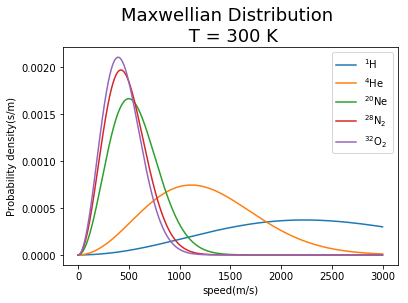

In [1]:
# plot Maxwellian distribution by matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

gas = [1.0, 4.0, 20, 28.0, 32.0]
name = [r'$^{1}$H', r'$^{4}$He', r'$^{20}$Ne', r'$^{28}$N$_{2}$', r'$^{32}$O$_{2}$']

# temperture
T = 300 

k = 1.38E-23
Vmin = 1
Vmax = 3000
N = int(Vmax - Vmin) # number of velociteis

def Max_dist(m, T, v):
    #v = np.arange(3000)
    a = (m/(2*np.pi*k*T))**1.5 
    a = a * 4.0 * np.pi
    a = a * v * v * np.exp(-m*v*v/(2.0*k*T))
    return a

v = np.arange(Vmin,Vmax)
nv = np.zeros((len(gas),N))

for i in range(len(gas)):
    mass = gas[i] * 1.67E-27

    for j in range(Vmin, Vmax-1):
        nv[i,j] = Max_dist(mass, T, j)


plt.figure()

for ii in range(len(name)):
    plt.plot(v, nv[ii,:], label=name[ii])

plt.xlabel('speed(m/s)')
plt.ylabel('Probability density(s/m)')
plt.title('Maxwellian Distribution \n T = 300 K', fontsize=18)

plt.legend()

In [2]:
# plot Maxwellian distribution by vpython with histogram diagram 
from vpython import *
import numpy as np


T1 = 300
T2 = 2000
T3 = 6000

k = 1.38E-23
m = 32 * 1.67E-27

Vmin = 1
Vmax = 3000
N = Vmax - Vmin # number of velociteis
dv = (Vmax-Vmin)/100

def Max_dist(m, T, v):
    a = (m/(2*np.pi*k*T))**1.5 
    a = a * 4.0 * np.pi
    a = a * v * v * np.exp(-m*v*v/(2.0*k*T))
    return a 


scene = canvas()
gd = graph(xtitle='speed(m/s)', ytitle='Probability density(s/m)', 
           title='Maxwellian Distribution in histogram diagram \n Oxygen gas ')

histo1 = gvbars(graph=gd, delta=dv, color=color.red, label='T=300K')  # 長條圖設定寬度為dv
histo2 = gvbars(graph=gd, delta=dv, color=color.green, label='T=2000K')
histo3 = gvbars(graph=gd, delta=dv, color=color.blue, label='T=6000K')

for v in np.arange(Vmin, Vmax, dv):        # step = dv
    histo1.plot(pos=(v, Max_dist(m,T1,v)))
    histo2.plot(pos=(v, Max_dist(m,T2,v)))
    histo3.plot(pos=(v, Max_dist(m,T3,v)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#VPython範例
from vpython import *

# Hard-sphere gas.

# Bruce Sherwood

win = 500

Natoms = 100  # change this to have more or fewer atoms

# Typical values
L = 1 # container is a cube L on a side
gray = color.gray(0.7) # color of edges of container
mass = 4E-3/6E23 # helium mass
Ratom = 0.03 # wildly exaggerated size of helium atom
k = 1.4E-23 # Boltzmann constant
T = 300 # around room temperature
dt = 1E-5

animation = canvas( width=win, height=win, align='left')
animation.range = L

d = L/2+Ratom
r = 0.005
boxbottom = curve(color=gray, radius=r)
boxbottom.append([vector(-d,-d,-d), vector(-d,-d,d), vector(d,-d,d), vector(d,-d,-d), vector(-d,-d,-d)])
boxtop = curve(color=gray, radius=r)
boxtop.append([vector(-d,d,-d), vector(-d,d,d), vector(d,d,d), vector(d,d,-d), vector(-d,d,-d)])
vert1 = curve(color=gray, radius=r)
vert2 = curve(color=gray, radius=r)
vert3 = curve(color=gray, radius=r)
vert4 = curve(color=gray, radius=r)
vert1.append([vector(-d,-d,-d), vector(-d,d,-d)])
vert2.append([vector(-d,-d,d), vector(-d,d,d)])
vert3.append([vector(d,-d,d), vector(d,d,d)])
vert4.append([vector(d,-d,-d), vector(d,d,-d)])

Atoms = []
apos = []
p = []
pavg = sqrt(2*mass*1.5*k*T) # average kinetic energy p**2/(2mass) = (3/2)kT
r = 0.005*L
    
for i in range(Natoms):
    x = L*random()-L/2
    y = L*random()-L/2
    z = L*random()-L/2
    if i == 0:
        Atoms.append(sphere(pos=vector(x,y,z), radius=Ratom, color=color.cyan, make_trail=True, retain=100))
    else: Atoms.append(sphere(pos=vector(x,y,z), radius=Ratom, color=gray))
    apos.append(vector(x,y,z))
    theta = pi*random()
    phi = 2*pi*random()
    px = pavg*sin(theta)*cos(phi)
    py = pavg*sin(theta)*sin(phi)
    pz = pavg*cos(theta)
    p.append(vector(px,py,pz))

animation.title = 'A "hard-sphere" gas'
s = """ Theoretical and averaged speed distributions (meters/sec).
 Initially all atoms have the same speed, but collisions
 change the speeds of the colliding atoms. One of the atoms is
 marked and leaves a trail so you can follow its path."""
animation.caption = s

deltav = 100 # binning for v histogram

def barx(v):
    return int(v/deltav) # index into bars array

nhisto = int(4000/deltav)
histo = []
for i in range(nhisto): histo.append(0.0)
histo[barx(pavg/mass)] = Natoms

graph( width=win, height=0.4*win, xmax=3000, ymax=Natoms*deltav/1000, align='right' )
theory = gcurve( color=color.blue )
dv = 10
for v in range(0,3001+dv,dv):  # theoretical prediction
    theory.plot( v, (deltav/dv)*Natoms*4*pi*((mass/(2*pi*k*T))**1.5) *exp(-0.5*mass*(v**2)/(k*T))*(v**2)*dv )

accum = []
for i in range(int(3000/deltav)): accum.append([deltav*(i+.5),0])
vdist = gvbars(color=color.red, delta=deltav )

def interchange(v1, v2):  # remove from v1 bar, add to v2 bar
    barx1 = barx(v1)
    barx2 = barx(v2)
    if barx1 == barx2:  return 
    histo[barx1] -= 1
    histo[barx2] += 1
    
def checkCollisions(apos):
    hitlist = []
    Natoms = len(apos)
    r2 = 2*Ratom
    r2 *= r2
    for i in range(Natoms):
        ai = apos[i]
        for j in range(i+1, Natoms) :
            aj = apos[j]
            dr = ai - aj
            if mag2(dr) < r2: hitlist.append([i,j])
    return hitlist

nhisto = 0 # number of histogram snapshots to average

while True:
    rate(150)
    # Accumulate and average histogram snapshots
    for i in range(len(accum)): accum[i][1] = (nhisto*accum[i][1] + histo[i])/(nhisto+1)
    if nhisto % 10 == 0:
        vdist.data = accum
    nhisto += 1

    # Update all positions
    for i in range(Natoms): Atoms[i].pos = apos[i] = apos[i] + (p[i]/mass)*dt
    
    # Check for collisions
    hitlist = checkCollisions(apos)

    # If any collisions took place, update momenta of the two atoms
    for ij in hitlist:
        i = ij[0]
        j = ij[1]
        ptot = p[i]+p[j]
        vi = p[i]/mass
        vj = p[j]/mass
        vrel = vj-vi
        a = vrel.mag2
        if a == 0: continue;  # exactly same velocities
        rrel = apos[i]-apos[j]
        b = 2*rrel.dot(vrel)
        c = rrel.mag2-4*Ratom*Ratom
        d = b*b-4*a*c
        if d < 0: continue  # something wrong; ignore this rare case
        deltat = (-b+sqrt(d))/(2*a) # t-deltat is when they made contact
        apos[i] = apos[i]-vi*deltat # back up to contact configuration
        apos[j] = apos[j]-vj*deltat
        mtot = 2*mass
        pcmi = p[i]-ptot*mass/mtot # transform momenta to cm frame
        pcmj = p[j]-ptot*mass/mtot
        rrel = norm(rrel)
        pcmi = pcmi-2*pcmi.dot(rrel)*rrel # bounce in cm frame
        pcmj = pcmj-2*pcmj.dot(rrel)*rrel
        p[i] = pcmi+ptot*mass/mtot # transform momenta back to lab frame
        p[j] = pcmj+ptot*mass/mtot
        apos[i] = apos[i]+(p[i]/mass)*deltat # move forward deltat in time
        apos[j] = apos[j]+(p[j]/mass)*deltat
        interchange(vi.mag, p[i].mag/mass)
        interchange(vj.mag, p[j].mag/mass)
    
    for i in range(Natoms):
        loc = apos[i]
        if abs(loc.x) > L/2:
            if loc.x < 0: p[i].x =  abs(p[i].x)
            else: p[i].x =  -abs(p[i].x)
        
        if abs(loc.y) > L/2:
            if loc.y < 0: p[i].y = abs(p[i].y)
            else: p[i].y =  -abs(p[i].y)
        
        if abs(loc.z) > L/2:
            if loc.z < 0: p[i].z =  abs(p[i].z)
            else: p[i].z =  -abs(p[i].z)


In [ ]:
# 未完成

# 圓柱形cylinder

![vpython_coordinate](.\images\vpython_coordinate.png)

`rod = cylinder(pos=vector(0,2,1), axis=vector(5,0,0), radius=1)`

The center of one end of this cylinder is at x=0, y=2, and z=1. Its axis lies along the x axis, with length 5, so that the other end of the cylinder is at (5,2,1), as shown in the accompanying diagram.


most of which also apply to other objects:

- `pos` Position: the center of one end of the cylinder; default = vector(0,0,0)
 axis The axis points from pos to the other end of the cylinder, default = vector(1,0,0). Setting the axis makes length equal to the magnitude of the axis. An object's axis and up attributes are always perpendicular to each other. Changing the direction of axis also changes the direction of up so that the two directions always remain at right angles to each other.

- `up` Which side of the cylinder is "up"; this has only a subtle effect on the 3D appearance of the cylinder unless a non-smooth texture is specified or the cross section is oval; the default is vector(0,1,0). An object's axis and up attributes are always perpendicular to each other. Changing the direction of up also changes the direction of axis so that the two directions always remain at right angles to each other.

- `length` Length of axis and x component of size; default is 1. Setting the length makes the magnitude of the axis equal to the length.

- `radius` The radius of the cylinder, default = 1

- `size` Instead of specifying length and radius, you can set size=vector(length,height,width), which means that the cross section of the cylinder can be elliptical, which is not currently possible in classic VPython. Setting size makes the magnitude of axis be equal to the x component of the size (the length).

- `color` Color of object, as a red-green-blue (RGB) triple: vector(1,0,0) is pure red, default = vector(1,1,1), which is color.white

- `red, green, blue` (can set these color attributes individually), defaults are all 1

- `opacity` Opacity of object, default = 1; 0 is completely transparent

- `shininess` 0 to 1, default 0.6; governs the amount of specular reflections.

- `emissive` If True, local and distant lights are ignored, and the brightness is governed by the object's own color. An example of its use is to put an emissive sphere at the location of a local_light, which looks like a glowing lamp. The default for emissive is False.


# 材質貼圖 (圖片渲染)

http://www.glowscript.org/docs/VPythonDocs/textures.html

在物件中加入
`texture=textures.xxx`

**將請先將vpython版本更新到7.4.4以上**

- vpython原本就有的圖，路徑為
  `C:\Users\<Your-name>\Anaconda3\Lib\site-packages\vpython\vpython_data\`
  ![vpython_texture](./images/vpython_texture.png)

  `sphere(texture=textures.earth)` 將全球的圖貼上球表面，可產生一顆地球樣子的球

  `box(texture=textures.metal)`  金屬材質的長方體

  `box=(texture=textures.wood)`  木頭材質的長方體

- 若要用自行新增的圖片：
 
  - 將圖片放入`C:\Users\<Your-name>\Anaconda3\Lib\site-packages\vpython\vpython_data\` 內
  
    若檔名為T.jpg，那麼指令為`texture='T.jpg'` 
    
    例如 `box(texture='T.jpg')`
    
     (ps:在Jupyter-notebook，需改為`texture='/nbextensions/vpython_data/T.jpg'`)
     
  - 或是將圖片與.py檔案放在同一資料夾
  
    用`texture={'file':'T.jpg'}`
    
    例如 `box(texture={'file':'T.jpg'})`

## 設定圖片在物件上顯示的參數

- 指定要顯示圖片的面: 可用的參數為 `left`, `right`, `sides` (除了左右面), `ends` (左右兩面), and     `all` (the default).

- In the case of a cylinder, 'sides' specifies the curving surface.
    
  使用`'place' : ['left', 'sides']` will place the texture on the left end and the sides.
  
- 翻轉flipping與旋轉rotating：

  `'flipx' : True` (reflect left <-> right)
  
  `'flipy' : True`(reflect up <-> down)
  
  `'turn' : N` (rotate counterclockwise N 90-degree angles; if N is negative, the turning is clockwise).
  
若要調整以上功能，引入圖片方式必須用自行新增圖片的方法，例如：
- 木頭材質的長方體（除了左右兩面不填）

`box(texture={'file':textures.wood, 'place':['sides']})`

- 貼上T.jpg圖檔

`box(texture={'file':'T.jpg', 'place':['left', 'sides']})`

All the parameters for a texture are seen in the following example.
`b = box( pos=vec(-1,2,0),
      texture={'file':textures.stucco, 
               'bumpmap':bumpmaps.stucco,
               'place':['right', 'sides'],
               'flipx':True,
               'flipy':True,
               'turn':-3} )`

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont


box( texture={'file':'flower_texture.jpg', 'place':'right'} )

# 若將python檔案跟圖片放在同一資料夾，可用下列方式：
# box(texture='flower_texture.jpg')

In [ ]:
# encoding: utf-8
from vpython import *
import numpy as np
import scipy.constants as cont

cylinder(axis=vec(0, 1, 0), size=vec(100, 10, 10),
         texture={'file': '101.jpg',
                  'turn': -45,
                  }
         )

# 以下均未完成

# Widgets: button,
radio, checkbox,
slider, menu, wtext
http://www.glowscript.org/docs/VPythonDocs/controls.html

# 滑鼠與鍵盤控制

http://www.glowscript.org/docs/VPythonDocs/mouse.html

In [ ]:

Click Example
This program displays a box, then repeatedly waits for a mouse left click and displays a cyan sphere at the mouse location. A mouse click is defined as pressing and releasing the left mouse button with no motion of the mouse, so the sphere appears when you release the mouse button.

scene.range = 4
box() # display a box for context

def showSphere(evt):
    loc = evt.pos
    sphere(pos=loc, radius=0.2, color=color.cyan)

scene.bind('click', showSphere)

Copy this program into an edit window and run the program. Click outside the box and a cyan sphere appears where you click. If you click inside the box, nothing seems to happen. This is because the mouse click is in the xy plane, and the sphere is buried inside the box. If you rotate the scene and then click, you'll see that the spheres go into the new plane parallel to the screen and passing through scene.center.

If you want all of the spheres to go into the xy plane, perpendicular to the z axis, change the latter part of the program like this:

    loc = evt.project(normal=vector(0,0,1))
    # loc is None if no intersection with plane
    if loc:
        sphere(pos=loc,radius=0.2,color=color.cyan)

In [ ]:
Drag Example
Here is the sequence of mouse events involved in dragging something:

1) Determine that the mouse button has been depressed (a mousedown event).

2) Continually watch for the mouse to move, and use scene.mouse.pos to update positions. These are mousemove events.

3) Conclude the drag when the mouse button has been released (a mouseup event).

The way you detect these mouse events is by writing functions that are bound to the mouse events using scene.bind, and GlowScript will execute these functions when these mouse events occur.

Here is a complete routine for repeatedly creating and dragging a sphere, so that you can arrange many spheres on the screen. While being dragged the sphere is red, but its color changes to cyan when the mouse button is released.

scene.range = 5
box()

drag = False
s = None # declare s to be used below

def down():
    nonlocal drag, s
    s = sphere(pos=scene.mouse.pos,
        color=color.red,
        size=0.2*vec(1,1,1))
    drag = True

def move():
    nonlocal drag, s 
    if drag: # mouse button is down
        s.pos = scene.mouse.pos

def up():
    nonlocal drag, s
    s.color = color.cyan
    drag = False

scene.bind("mousedown", down)

scene.bind("mousemove", move)

scene.bind("mouseup", up)

It is also possible to use "anonymous" (unnamed) functions, an extended feature of the RapydScript Python-to-JavaScript compiler, as shown here:

scene.range = 5
box()

drag = False
s = None # declare s to be used below

scene.bind("mousedown", def ():
    nonlocal drag, s
    s = sphere(pos=scene.mouse.pos,
               color=color.red,
               size=0.2*vec(1,1,1))
    drag = True
)

scene.bind("mousemove", def ():
    nonlocal drag, s 
    if drag: # mouse button is down
        s.pos = scene.mouse.pos
)

scene.bind("mouseup", def ():
    nonlocal drag, s
    s.color = color.cyan
    drag = False
)

 

Other mouse events: You can also watch for mouseenter (the mouse is moved from the outside of the canvas to the inside), mouseleave (the mouse leaves the canvas), and click.

Multiple event types: You can bind a function to more than one type of event. Here is a function bound to both mousedown and mouseup events, either of which will cause a sphere to be created:

scene.bind("mousedown mouseup", def ():
    sphere(pos=scene.mouse.pos)
)

Unbinding: After binding a function to a mouse event, you can unbind the function, in which case GlowScript will no longer send events to your function. In the program shown above, if you place scene.unbind("mousedown") in the mouseup event, you will be able to drag just one sphere.

Just one: If you use scene.one instead of scene.bind, the binding occurs for just one event and then is automatically unbound. In the program shown above, if you specify scene.one for the mousedown event, you will be able to drag just one sphere.

Custom events: You can set up your own custom events using scene.trigger. In the following sample program, first you see a box, then the while loop halts waiting for the custom "ball" event to occur. When you click, the "click" function is executed, and in the click function a sphere is created and a new type of event, "ball", is triggered by scene.trigger, with optional argument newball = s. With this triggering of a "ball" event, the "ball" function receives the triggered arguments in ev and sets the sphere's color to blue. The triggering of the "ball" function also breaks through the scene.waitfor in the while loop that was waiting for a "ball" event. The scene.waitfor statement returns the entity that was sent to the "ball" function, and uses the sphere's position to reposition the box. The process in the loop then repeats.

scene.bind("click", def ():
    s = sphere(pos=scene.mouse.pos)
    scene.trigger("ball", newball=s)
)

scene.bind("ball", def (ev):
    ev.newball.color = color.blue
)

b = box()

while True:
    ss = scene.waitfor("ball")
    b.pos = ss.newball.pos + vec(0,-1, 0)

In [ ]:
Keyboard Interactions
As with mouse events, you can wait for various kinds of keyboard or mouse events:

scene.waitfor('keydown') # wait for keyboard key press
scene.waitfor('keyup')   # wait for keyboard key release
scene.waitfor('click keydown') # click or keyboard 
scene.waitfor('click')     # wait for a click
scene.waitfor('mousedown') # wait for mouse button press
scene.waitfor('mouseup') # wait for mouse button release
scene.waitfor('mousemove') # wait for mouse to be moved
scene.waitfor('mousedown mousemove') # either event
The event 'keydown' or 'keyup' occurs when you press or release a key on the keyboard (if you hold down a key, you may get multiple 'keydown' events due to repeats).

Jupyter notebook limitation: Key events are swallowed by the Jupyter notebook as part of the user interface and are not available to a VPython program.

You can obtain a package of information about the event that caused the end of the wait:

box()
ev = scene.waitfor('click keydown')
if ev.event == 'click':
    print('You clicked at', ev.pos)
else:
    print('You pressed key '+ev.key)

Handling events with callbacks

Here is a test routine using callbacks that lets you type text into a label.

prose = label() # initially blank text

def keyInput(evt):
    s = evt.key
    if len(s) == 1:
        prose.text += s # append new character
    elif s == 'delete' and len(prose.text) > 0:
        prose.text = prose.text[:-1] # erase letter

scene.bind('keydown', keyInput)

We define a "function" named "keyInput". Then we "bind" this function to 'keydown' events occurring in the canvas named "scene". Whenever VPython detects that a 'keydown' event has occurred, VPython calls the bound function, which in this case adds the input to the text of the label object.

Note that evt.ctrl, evt.alt, and evt.shift are True if the corresponding key is down at the time of the event (evt.shift is also True if Caps Lock is in effect).

This operation is called a "callback" because with scene.bind you register with VPython that you want to be called back any time there is a 'keydown' event. Here are the built-in events that you can specify in a bind operation:

Keyboard: keydown, keyup
Mouse:    click, mousedown, mousemove, mouseup
Other:    redraw, draw_complete

The event 'keydown' or 'keyup' occurs when you press or release a key on the keyboard. The events 'click', 'mousedown', 'mousemove', and 'mouseup' are discussed in the mouse section. A 'redraw' event occurs just before the 3D scene is redrawn on the screen, and a 'draw_complete' event occurs just after the redrawing (these event have rather technical uses such as timing how often redrawings occur, or how much time they take).

You can bind more than one event to a function. The following will cause the callback function to be executed whether you click with the mouse or press a key on the keyboard:

scene.bind('click keydown', myFunction)

With the following statement, click event will no longer be sent to myFunction:

scene.unbind('click', myFunction)

The example program eventHandlers.py illustrates the callback method for handling many kinds of events.

Pausing for keyboard or mouse input

Often you want to pause for either mouse or keyboard input which you can do by executing scene.waitfor('click keydown').

